![](Picture1.png)

# <span style="color:navy"> <i> Seminar 02</i></span> : <span style="color:green"> <b>Video Coding</b> </span>
### Prepared by <b> Dr. Imran </b>

## <span style="color:navy"> <b>TASK:</b> Geometric Transformations of Images </span>

### <span style="color:green">TASK Goals: </span>
Learn to apply different geometric transformations to images, like
1. Scalling
2. Translation
3. Rotation
4. Affine transformation
5. Perspective transformation

## <span style="color:green"> Transformations: </span>
OpenCV provides two transformation functions  
1. `cv.warpAffine`
2. `cv.warpPerspective`  

with which you can perform all kinds of transformation.

<b> NOTE: </b>
`cv.warpAffine` takes a $2$x$3$ transformation matrix while `cv.warpPerspective` takes a $3$x$3$ transformation matrix as input.

# <span style="color:navy"> START Your Solution </span>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## <span style="color:green"> TASK 01: <b>Scaling</b> </span>
- Scaling is just resizing of the image. OpenCV comes with a function `cv.resize()` for this purpose.
- The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used.
- Preferable interpolation methods are `cv.INTER_AREA` for shrinking and `cv.INTER_CUBIC` (slow) & `cv.INTER_LINEAR` for zooming.
- By default, the interpolation method `cv.INTER_LINEAR` is used for all resizing purposes.

### <span style="color:blue"> 1. Original Image </span>
Original Image is show here. Yo can read image by using the cell below  
![](image02.png)

#### <span style="color:red"> NOTE: </span> Keep the BGR format of the image

(383, 510, 3)


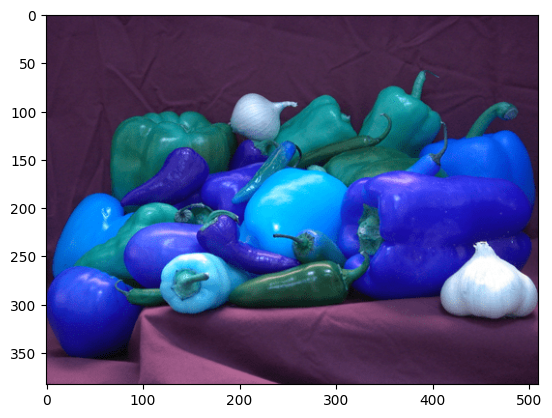

In [2]:
img = cv.imread('image02.png');
plt.imshow(img);
print(img.shape);

#### <span style="color:blue"> 2. Down-Scale Image ( $2$ Times) </span>
In this section complete the function `def dscale():` below to down scale the image by factor $2$ (Half the Size of Original)
- Note: <span style="color:red"> You MUST use the interpolation option of opencv as `cv.INTER_LINEAR` </span>

Scaled Image Shape =  (192, 255, 3)


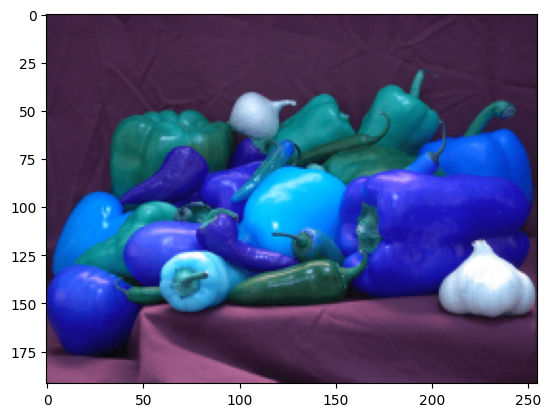

In [3]:
def dscale():
    # Read the image using:   img = cv.imread('image02.png');
    # Down Scale using cv.resize()
    
    # YOUR CODE HERE
    img = cv.imread('image02.png')
    resd = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_LINEAR)
    # Stop code here and return the out put as "resd"
    return resd

# Let us see the results
resd = dscale();
plt.imshow(resd);
print("Scaled Image Shape = ", resd.shape)

#### <span style="color:navy"> Execute the cell to evaluate your code </span>
Once You have finished your function completion, execute the next cell below to evaluate your code and results

In [4]:
# Run the Cell to check correctness of the solutions

#### <span style="color:blue"> 3. Up-Scale ( $10$ times) </span> 
In this section complete the function `def upscale():` below to up scale the image by factor $10$ (10 time the original image)
- Note: <span style="color:red"> You MUST use the interpolation option of opencv as `cv.INTER_CUBIC` </span>

Scaled Image Shape =  (3830, 5100, 3)


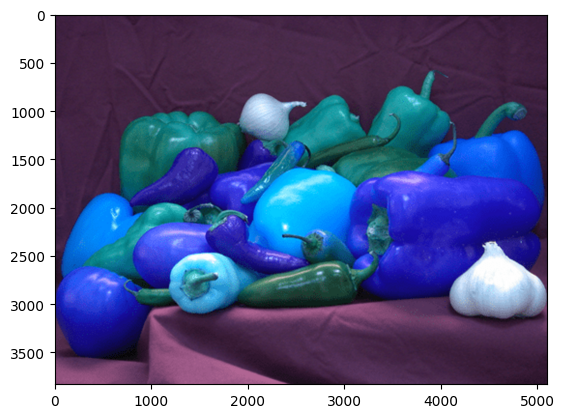

In [5]:
def upscale():
    # Read the image using:   img = cv.imread('image02.png');
    # Up Scale using cv.resize()
    
    # YOUR CODE HERE
    img = cv.imread('image02.png')
    resu = cv.resize(img, None, fx=10, fy=10, interpolation=cv.INTER_CUBIC)

    # Stop code here and return the out put as "resu"
    return resu
resu = upscale();
plt.imshow(resu);
print("Scaled Image Shape = ",resu.shape)

#### <span style="color:navy"> Execute the cell to evaluate your code </span>
Once you have finished your function completion, execute the next cell below to evaluate your code and results

In [6]:
# Run the Cell to check correctness of the solutions

## <span style="color:green"> TASK 02: <b>Translation</b> </span>
Translation is the shifting of an object's location. If you know the shift in the $(x,y)$ direction and let it be $(t_x,t_y)$, you can create the transformation matrix $M$ as follows:

$ M=\begin{bmatrix} {1} & {0} & {t_x} \\ {0} & {1}& {t_y} \end {bmatrix} $
<br>
<br>
You can make it into a Numpy array of type `np.float32` and pass it into the `cv.warpAffine()` function.

#### <span style="color:blue"> 3. Image Shifting $(100,50)$: </span>
In this section complete the function `def imshift():` below to shift the image by at $t_x = 100$ and $t_y = 50$

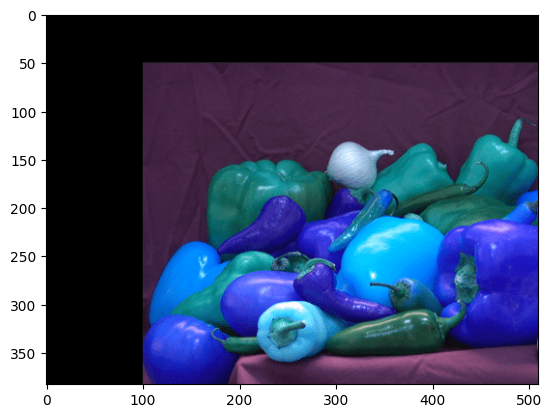

In [7]:
def imshift():
    # Read the image using:   img = cv.imread('image02.png');
    # Use the opencv function `cv.warpAffine`
    
    # YOUR CODE HERE
    img = cv.imread('image02.png')
    tx, ty = 100, 50
    M = np.float32([[1, 0, tx], [0, 1, ty]])

    # Apply the translation
    dst = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
    # Stop code here and return the out put as "dst"
    return dst
dst = imshift();
plt.imshow(dst);

#### <span style="color:navy"> Execute the cell to evaluate your code </span>
Once you have finished your function completion, execute the next cell below to evaluate your code and results

In [8]:
# Run the Cell to check correctness of the solutions

## <span style="color:green"> TASK 03: <b>Rotation</b> </span>
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix $M$ of the form:

$ M=\begin{bmatrix} {\cos(\theta)} & {-\sin(\theta)} \\ {\sin(\theta)} & {\cos(\theta)} \end {bmatrix} $

<br>
But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by:
<br>
<br>
$ M=\begin{bmatrix} {\alpha} & {\beta} & {(1-\alpha).center.x-\beta.center.y} \\ {-\beta} & {\alpha} & {\beta.center.x+(1-\alpha).center.y} \end {bmatrix} $
<br>
<br>
Where: $ \alpha = scale.\cos(\theta) $ and $ \beta = scale.\sin(\theta) $
<br>
<br>

To find this transformation matrix, <b>OpenCV</b> provides a function, `cv.getRotationMatrix2D`

#### <span style="color:blue"> Rotates image by $45^0$ with respect to center without any scaling: </span>
In this section complete the function `def imrotate():` below to rotate the image by $45^0$
- Hint: Define the rotation matric $M$ with `cv.getRotationMatrix2D` and use it (i.e. $M$)in `cv.warpAffine` complete the task

[[  0.70710678   0.70710678 -60.7231778 ]
 [ -0.70710678   0.70710678 236.40128061]]


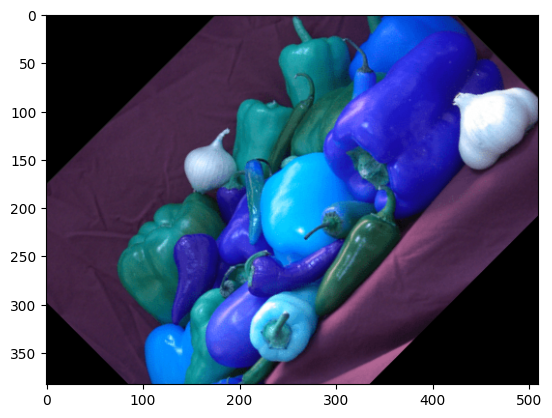

In [13]:
def imrotate():
    # Read the image using:   img = cv.imread('image02.png');
    # Use the opencv function `cv.warpAffine`
    # YOUR CODE HERE
    img = cv.imread('image02.png')
    # Define the rotation angle and rotation matrix
    angle = 45
    rows, cols = img.shape[:2]
    M = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)

    # Apply the rotation
    dst = cv.warpAffine(img, M, (cols, rows))
    # Stop code here and return the out put as "dst"
    print(M)
    return dst
dst = imrotate();
plt.imshow(dst);

#### <span style="color:navy"> Execute the cell to evaluate your code </span>
Once you have finished your function completion, execute the next cell below to evaluate your code and results

In [10]:
# Run the Cell to check correctness of the solutions

## <span style="color:blue"> <b> End of Tasks</b> </span>
#### <span style="color:green"> Good Luck </span>

#### <span style="color:red"> DO NOT Run the notebook further </span>